<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/skin_change_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


[271 729]
709 709 1148
463 501


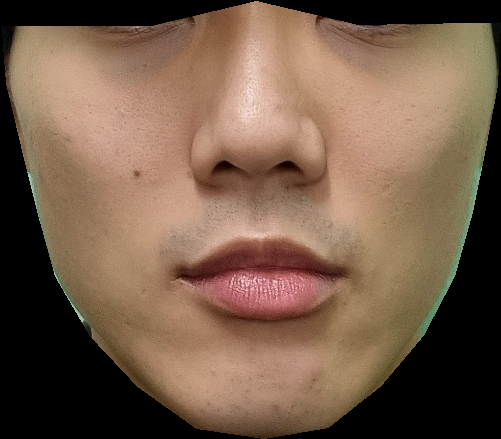

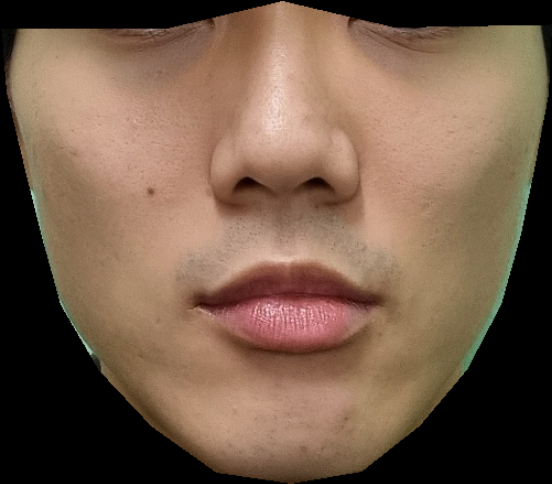

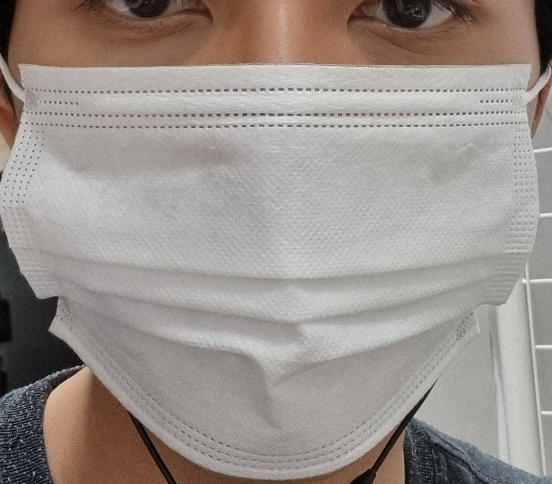

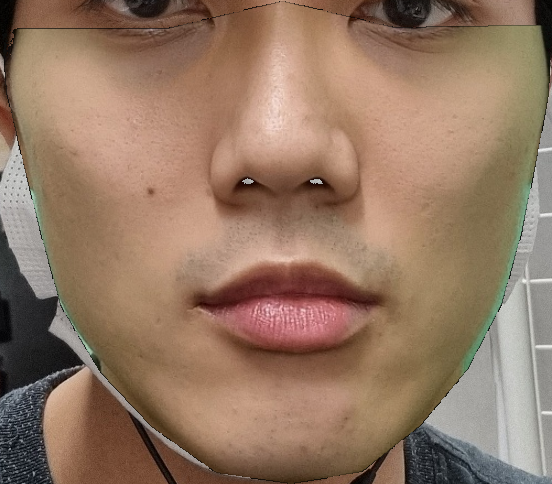

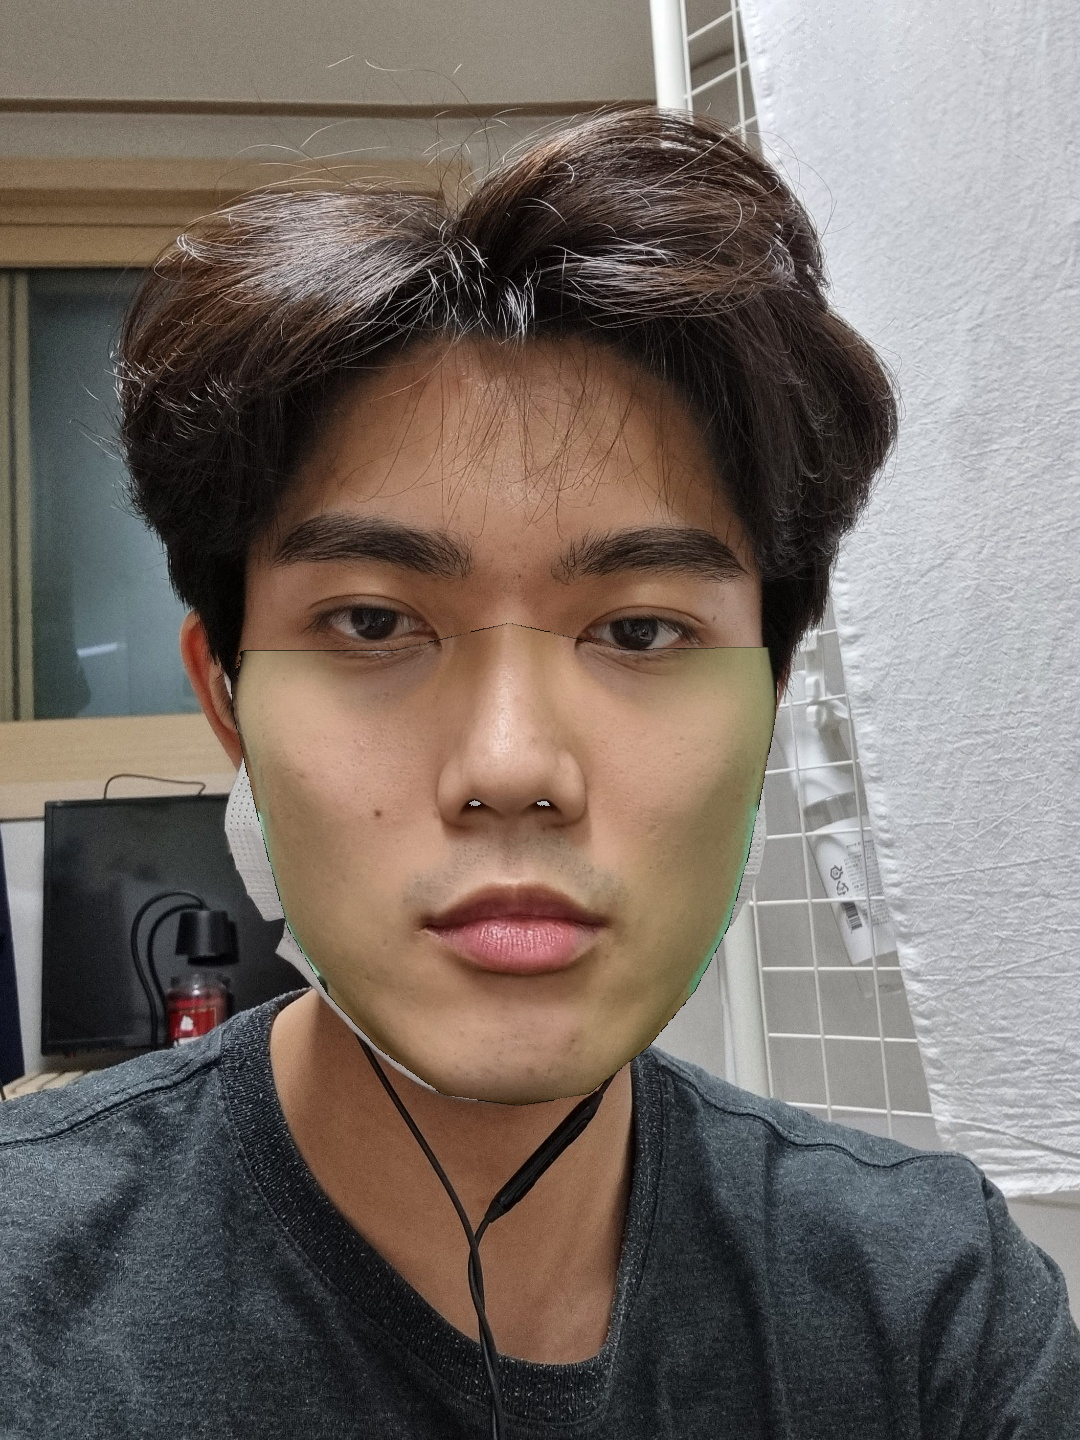

In [23]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import os
import math



detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/opencv/shape_predictor_68_face_landmarks.dat')
  
# load image
img = cv2.imread('/gdrive/MyDrive/opencv/face5.jpg')
img2 = cv2.imread('/gdrive/MyDrive/opencv/face8.jpg')
h, w, ch = img.shape
landmark1 = np.empty((68,2),int)
landmark2 = np.empty((68,2),int)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
rects = detector(gray,1)
rects2 = detector(gray2,1)
roi = rects[0]
roi2 = rects2[0]
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
shape2 = predictor(gray2, roi2)
shape2 = face_utils.shape_to_np(shape2)
landmark1 = shape
landmark2 = shape2


# extract jawline
jawline = landmark1[0:17]
lefteye = landmark1[36:42]
righteye = landmark1[42:48]

nose = landmark1[27][1]
#print(landmark1)

top = nose
bottom = max(jawline[:,1])
side1 = min(jawline[:,0])
side2 = max(jawline[:,0])
side = side2-side1

lefteyeline = max(lefteye[:,1])
righteyeline = max(righteye[:,1])


# extend contour for masking
jawline = np.append(jawline, [ w-1, landmark1[42][1]]).reshape(-1, 2)
jawline = np.append(jawline, [landmark1[47][0],landmark1[47][1]]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[27][0],landmark1[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, nose]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [0, nose]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[27][0],landmark1[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[40][0],landmark1[40][1]]).reshape(-1,2)
jawline = np.append(jawline, [ 0, landmark1[40][1] ]).reshape(-1, 2)
contours = [jawline]

# generate mask
mask = np.ones((h,w,1), np.uint8) * 255 # times 255 to make mask 'showable'
cv2.drawContours(mask, contours, -1, 0, -1) # remove below jawline
# apply to image
result = cv2.bitwise_and(img, img, mask = mask)
result = result[nose:bottom, side1:side2] # crop ROI
cv2.imwrite('/gdrive/MyDrive/result.png', result)
print(jawline[0])
print(nose, top, bottom)
print(roi.width(), side)

cv2_imshow(result)

x1 = landmark1[36][0] - landmark1[45][0]
y1 = landmark1[36][1] - landmark1[45][1]
c = math.sqrt((x1**2)+(y1**2))

x2 = landmark2[36][0] - landmark2[45][0]
y2 = landmark2[36][1] - landmark2[45][1]
c2 = math.sqrt((x2**2)+(y2**2))

s = c2/c

# 두 이미지 합하기
def func(hpos, vpos, size):
  src = result
  src = cv2.resize(src, dsize=(0,0), fx =size, fy= size, interpolation = cv2.INTER_LINEAR)
  cv2_imshow(src)
  rows, cols, channels = src.shape
  roi = img2[hpos:rows+hpos,vpos:cols+vpos]
  cv2_imshow(roi)

  img2gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
  src_fg = cv2.bitwise_and(src, src, mask=mask)

  tmp = cv2.add(img_bg, src_fg)
  img2[hpos:rows+hpos, vpos:cols+vpos] = tmp

  cv2_imshow(tmp)
  cv2_imshow(img2) 

func(landmark2[27][1],landmark2[0][0], s)

113 139 179
132 157 197


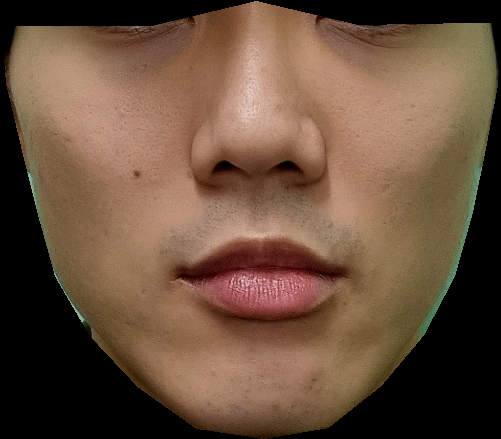

In [38]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import os
import math


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/opencv/shape_predictor_68_face_landmarks.dat')

src = cv2.imread('/gdrive/MyDrive/result.png', cv2.IMREAD_COLOR)
img = cv2.imread('/gdrive/MyDrive/opencv/face5.jpg')
img2 = cv2.imread('/gdrive/MyDrive/opencv/face8.jpg', cv2.IMREAD_COLOR)

landmark1 = np.empty((68,2),int)
landmark2 = np.empty((68,2),int)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
rects = detector(gray,1)
rects2 = detector(gray2,1)
roi2 = rects2[0]
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
shape2 = predictor(gray2, roi2)
shape2 = face_utils.shape_to_np(shape2)
landmark1 = shape
landmark2 = shape2

b1,r1,g1 = img[landmark1[27][1],landmark1[27][0]]
b2,r2,g2 = img2[landmark2[27][1],landmark2[27][0]]
print(b1,r1,g1)
print(b2,r2,g2)
val1 = b2-b1
val2 = r2-r1
val3 = g2-g1

val = min(val1,val2,val3)

array = np.full(src.shape, (val, val, val), dtype = np.uint8)

if(val1<0):
  src = cv2.add(src,array)
else:
  src = cv2.subtract(src,array)


cv2_imshow(src)

[227 643]
622 622 1108
556 559


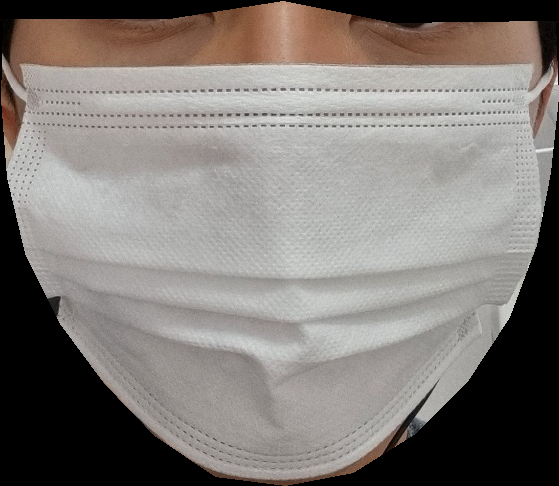

132 157 197
113 139 179


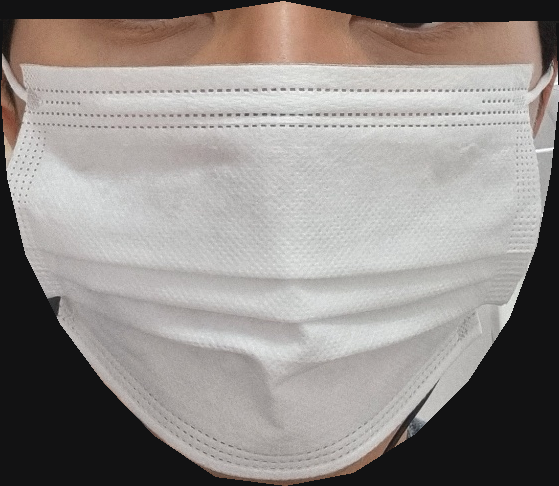

[19 18 18]


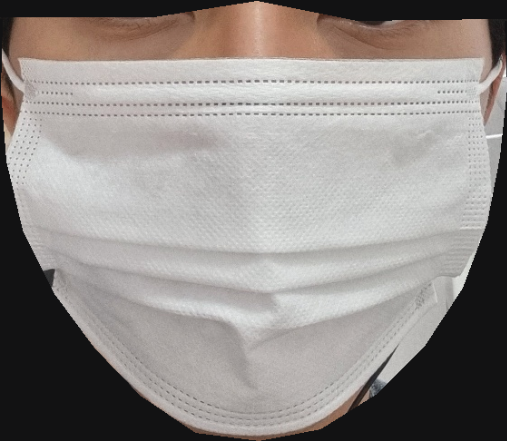

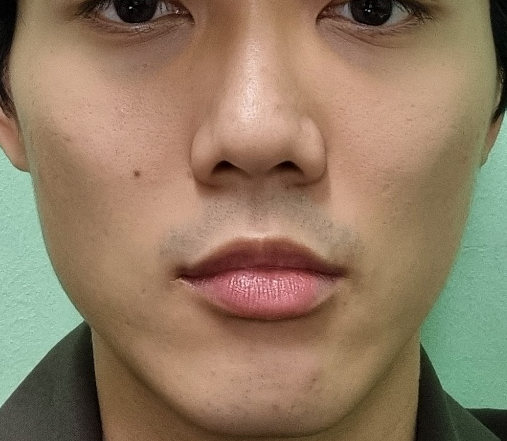

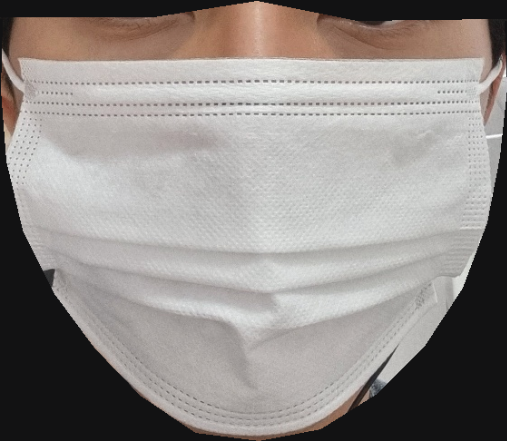

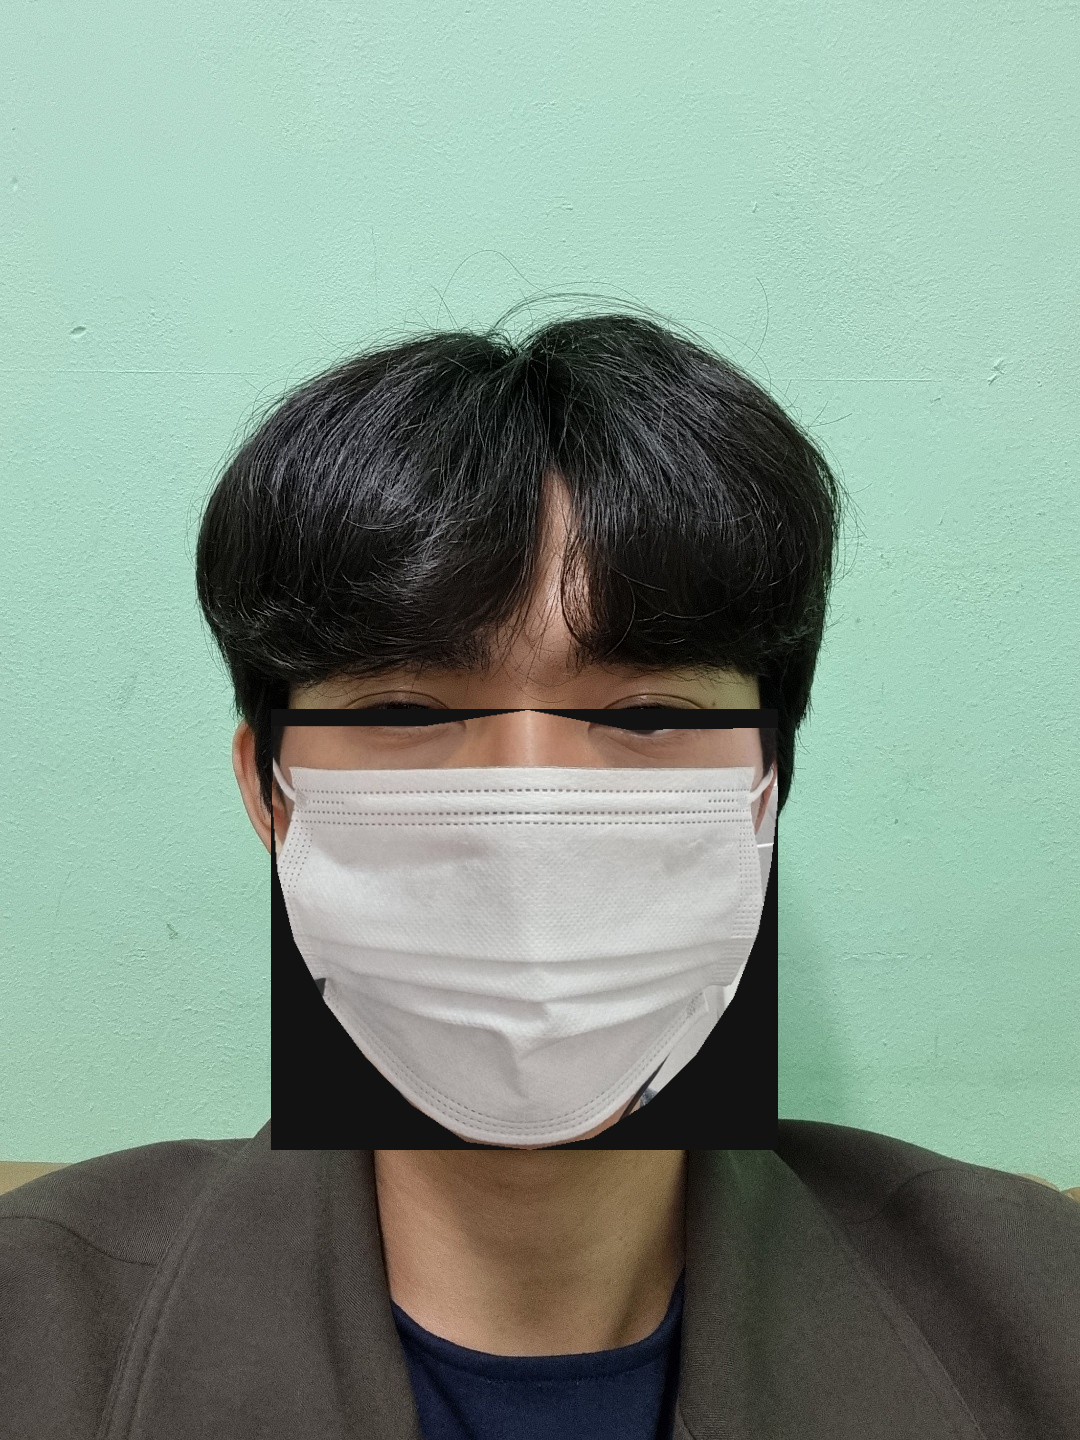

In [101]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import os
import math



detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/opencv/shape_predictor_68_face_landmarks.dat')
  
# load image
img = cv2.imread('/gdrive/MyDrive/opencv/face8.jpg') #마스크를 안 낀 사진
img2 = cv2.imread('/gdrive/MyDrive/opencv/face5.jpg') #마스크를 낀 사진
h, w, ch = img.shape
landmark1 = np.empty((68,2),int)
landmark2 = np.empty((68,2),int)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
rects = detector(gray,1)
rects2 = detector(gray2,1)
roi = rects[0]
roi2 = rects2[0]
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
shape2 = predictor(gray2, roi2)
shape2 = face_utils.shape_to_np(shape2)
landmark1 = shape
landmark2 = shape2


# extract jawline
jawline = landmark1[0:17]
lefteye = landmark1[36:42]
righteye = landmark1[42:48]

nose = landmark1[27][1]
#print(landmark1)

top = nose
bottom = max(jawline[:,1])
side1 = min(jawline[:,0])
side2 = max(jawline[:,0])
side = side2-side1

lefteyeline = max(lefteye[:,1])
righteyeline = max(righteye[:,1])


# extend contour for masking
jawline = np.append(jawline, [ w-1, landmark1[42][1]]).reshape(-1, 2)
jawline = np.append(jawline, [landmark1[47][0],landmark1[47][1]]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[27][0],landmark1[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, nose]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [0, nose]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[27][0],landmark1[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[40][0],landmark1[40][1]]).reshape(-1,2)
jawline = np.append(jawline, [ 0, landmark1[40][1] ]).reshape(-1, 2)
contours = [jawline]

# generate mask
mask = np.ones((h,w,1), np.uint8) * 255 # times 255 to make mask 'showable'
cv2.drawContours(mask, contours, -1, 0, -1) # remove below jawline
# apply to image
result = cv2.bitwise_and(img, img, mask = mask)
result = result[nose:bottom, side1:side2] # crop ROI
cv2.imwrite('/gdrive/MyDrive/result.png', result)
print(jawline[0])
print(nose, top, bottom)
print(roi.width(), side)

cv2_imshow(result)

x1 = landmark1[36][0] - landmark1[45][0]
y1 = landmark1[36][1] - landmark1[45][1]
c = math.sqrt((x1**2)+(y1**2))

x2 = landmark2[36][0] - landmark2[45][0]
y2 = landmark2[36][1] - landmark2[45][1]
c2 = math.sqrt((x2**2)+(y2**2))

s = c2/c

#피부톤 조정
b1,r1,g1 = img[landmark1[27][1],landmark1[27][0]]
b2,r2,g2 = img2[landmark2[27][1],landmark2[27][0]]
print(b1,r1,g1)
print(b2,r2,g2)
val1 = max(b1,b2) - min(b1,b2)
val2 = max(r1,r2) - min(r1,r2)
val3 = max(g1,g2) - min(g1,g2)



array = np.full(result.shape, (val1, val2, val3), dtype = np.uint8)

if(max(b1,b2)==b1):
  result = cv2.add(result,array)
else:
  result = cv2.subtract(result,array)


cv2_imshow(result)
print(result[0,0])

# 두 이미지 합하기
def func(hpos, vpos, size):
  src = result
  src = cv2.resize(src, dsize=(0,0), fx =size, fy= size, interpolation = cv2.INTER_LINEAR)
  cv2_imshow(src)
  rows, cols, channels = src.shape
  roi = img2[hpos:rows+hpos,vpos:cols+vpos]
  cv2_imshow(roi)

  img2gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
  src_fg = cv2.bitwise_and(src, src, mask=mask)

  tmp = cv2.add(img_bg, src_fg)
  img2[hpos:rows+hpos, vpos:cols+vpos] = tmp

  cv2_imshow(tmp)
  cv2_imshow(img2) 

func(landmark2[27][1],landmark2[0][0], s)